<a href="https://colab.research.google.com/github/seeratemarryum/Deep-Learning-ML/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
#no of images: 4th dimension so convert MNSIT files into tensor of 4d (no of imgs, heights, width, color channel)
transform=transforms.ToTensor()

In [84]:
# train data
train_data=datasets.MNIST(root='mnist_cnn_data',train=True,download=True,transform=transform)  #save/download it to some directory in google collab in tensor form


In [85]:
# test data
test_data=datasets.MNIST(root='mnist_cnn_data',train=False,download=True,transform=transform)  #save/download it to some directory in google collab in tensor form


In [86]:
# to ensure it worked: 60k: train data, 10k: test data
train_data


Dataset MNIST
    Number of datapoints: 60000
    Root location: mnist_cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [87]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: mnist_cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [88]:
pwd

'/content'

In [89]:
ls

mnist_cnn_data/  sample_data/


In [90]:
cd mnist_cnn_data

/content/mnist_cnn_data


In [91]:
ls

MNIST/


In [92]:
cd ../

/content


In [93]:
pwd

'/content'

In [94]:
# create loader for data: determine batch size: smal set of images: 2/4/10
#create small batch size for images
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10,shuffle=False)


In [95]:
# Define our CNN Model
#Describe Convolutional layer and what its doing: 2 convolutional layer
conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3,stride=1) #input, featurue maps/output/filters, cross side stride across, step length= 1 1 at a time
conv2=nn.Conv2d(in_channels=6,out_channels=16,kernel_size=3,stride=1)  #out of con1 will be input of this layer


In [96]:
# grab 1 mnist record: 1 image
for i, (X_train, y_train) in enumerate(train_data):
    break

In [97]:
X_train

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [98]:
X_train.shape #1 image, 28x28 ; size

torch.Size([1, 28, 28])

In [99]:
#convert it into 4d batch
x=X_train.view(1,1,28,28) #1 batch of 1 image of size 28x28

In [100]:
#perform our 1st convolution
x=F.relu(conv1(x))

In [101]:
#1 single image, 6: feature maps/filters, 26: because we hav padding in mnist dataset bbut here we haven't define it so it loss that data
x.shape

torch.Size([1, 6, 26, 26])

In [102]:
#pass thru the pooling layer
x=F.max_pool2d(x,2,2) #kernel:2 and stride: 2

In [103]:
# 13: shrink 26/2=13
x.shape

torch.Size([1, 6, 13, 13])

In [104]:
# do our second convolutional layer
x=F.relu(conv2(x))

In [105]:
x.shape  #we dont set padding so it become 11 (lose 2 pixels)

torch.Size([1, 16, 11, 11])

In [106]:
# pooling layer
x=F.max_pool2d(x,2,2)

In [108]:
x.shape # 11/2=5.5=5

torch.Size([1, 16, 5, 5])

In [109]:
#(((28-2padding)/2poolinglayer)-2secconvlayer)/2secpooling)
((28-2)/2-2)/2

5.5

In [110]:
# Model class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3,stride=1)
    self.conv2=nn.Conv2d(in_channels=6,out_channels=16,kernel_size=3,stride=1)
    self.fc1=nn.Linear(in_features=5*5*16,out_features=120)   #out can be any(neurons thata are flattening)
    self.fc2=nn.Linear(in_features=120,out_features=84)
    self.fc3=nn.Linear(in_features=84,out_features=10)

    # forward ftn that pushes all through layers
  def forward(self,x):
    x=F.relu(self.conv1(x))
    x=F.max_pool2d(x,2,2)
    x=F.relu(self.conv2(x))
    x=F.max_pool2d(x,2,2)

    #review to flatten it out
    x=x.view(-1,5*5*16)  #-1 so that we can vary the batch size

    #fully connected layers
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)

    return F.log_softmax(x,dim=1)  #


In [112]:
#create an instance of model
torch.manual_seed(41)
model=ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [113]:
from logging import critical
# loss function optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [115]:
import time
# to track how long it takes
start_time=time.time()

#create variables to track things
epochs=5
train_loss=[]
test_loss=[]
train_correct=[]
test_correct=[]

# for loops of epochs
for i in range(epochs):
  trn_corr=0      #training correct
  tst_corr=0

  #train
  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1   #start our batches at 1

    #apply model
    y_pred=model(X_train)  # get predicted values from training set. not flattened: 1st conv layer is conv2d
    loss=criterion(y_pred,y_train)  # compare pred to correct answers in ytrain
    predicted=torch.max(y_pred.data,1)[1] # add up the no of correct pred and indexed off the first point
    batch_corr=(predicted==y_train).sum()  # how many we got corr from the batch: tru=1 f=0, sum them
    trn_corr+=batch_corr    #keep track as we go along and train

    #backprop/update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #print out some results
    if b%600==0:
      print(f'epoch: {i}  batch: {b}  loss: {loss.item()}')

  train_loss.append(loss)
  train_correct.append(trn_corr)

  #test
  with torch.no_grad():   #no grad: dont update biases and weights  with test data
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]   #adding up correct pred
      tst_corr+=(predicted==y_test).sum()  #t=1 f=0, and sum away

  loss=criterion(y_val,y_test)
  test_loss.append(loss)
  test_correct.append(tst_corr)


current_time=time.time()
total_time=current_time-start_time
print(f'Training took: {total_time} minutes!')

epoch: 0  batch: 600  loss: 0.01122160442173481
epoch: 0  batch: 1200  loss: 0.5097795128822327
epoch: 0  batch: 1800  loss: 0.27345114946365356
epoch: 0  batch: 2400  loss: 0.5706523656845093
epoch: 0  batch: 3000  loss: 0.010505528189241886
epoch: 0  batch: 3600  loss: 0.1338011920452118
epoch: 0  batch: 4200  loss: 0.0005176571430638433
epoch: 0  batch: 4800  loss: 0.10394303500652313
epoch: 0  batch: 5400  loss: 0.2622598111629486
epoch: 0  batch: 6000  loss: 0.0009407080942764878
epoch: 1  batch: 600  loss: 0.010575367137789726
epoch: 1  batch: 1200  loss: 0.004694225732237101
epoch: 1  batch: 1800  loss: 0.06041830778121948
epoch: 1  batch: 2400  loss: 0.08412185311317444
epoch: 1  batch: 3000  loss: 1.2497214078903198
epoch: 1  batch: 3600  loss: 0.5397676229476929
epoch: 1  batch: 4200  loss: 0.005220157094299793
epoch: 1  batch: 4800  loss: 0.0007686594035476446
epoch: 1  batch: 5400  loss: 0.0005603323224931955
epoch: 1  batch: 6000  loss: 0.08629796653985977
epoch: 2  batch:

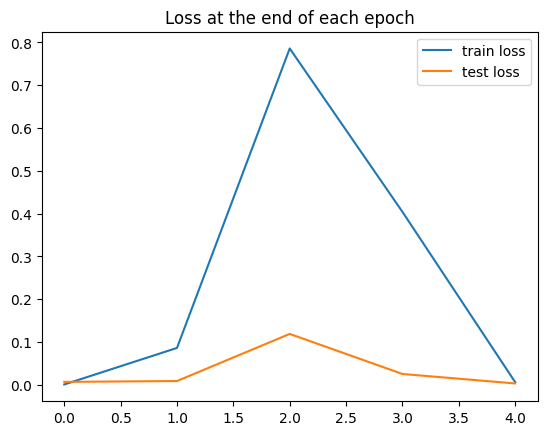

In [117]:
train_loss=[tl.item() for tl in train_loss]
plt.plot(train_loss,label='train loss')
plt.plot(test_loss,label='test loss')
plt.title('Loss at the end of each epoch')
plt.legend()

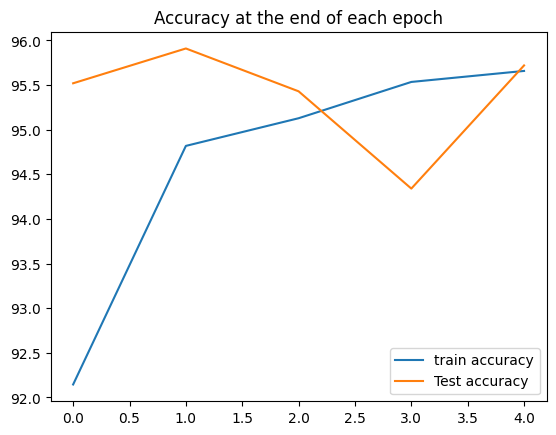

In [120]:
plt.plot([t/600 for t in train_correct],label='train accuracy')
plt.plot([t/100 for t in test_correct],label='Test accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [121]:
test_load_everything=DataLoader(test_data,batch_size=10000,shuffle=False)


In [123]:
with torch.no_grad():
  correct=0
  for X_test, y_test in test_load_everything:
    y_val=model(X_test)
    predicted=torch.max(y_val.data,1)[1]
    correct+=(predicted==y_test).sum()

In [124]:
# did for correct
correct.item()/len(test_data)*100

95.72

In [125]:
# grab an image
test_data[4143]  # give tensor with img in it and at end it show label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [126]:
# grab just the data
test_data[4143][0] # tensoe without label

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [127]:
# reshape it
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

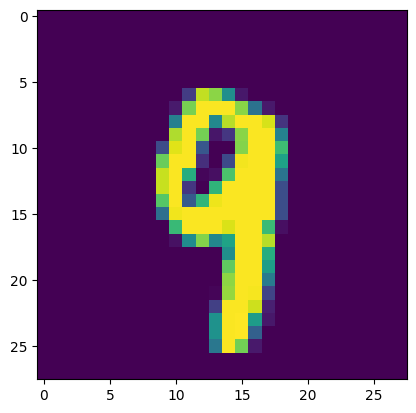

In [129]:
# show image
plt.imshow(test_data[4143][0].reshape(28,28))

In [130]:
# pass image thru our model
model.eval()
with torch.no_grad():
  new_pred=model(test_data[4143][0].view(1,1,28,28))

In [131]:
# check new pred pobabiilities
new_pred

tensor([[-14.1406, -10.4021, -11.7207,  -9.3655,  -3.4136, -11.3221, -23.4596,
          -6.9363,  -6.9563,  -0.0356]])

In [133]:
# we need max of this
new_pred.argmax()

tensor(9)